<a href="https://colab.research.google.com/github/oleg61/DataScient/blob/main/FPS_HW_reg_py%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Подключаем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Подключаем датасет

In [ ]:
df = pd.read_excel('data_hw_reg.xlsx')
df.head()

,date,country,confirmed,deaths
0,2020-01-22,Russia,0,0
1,2020-01-22,US,1,0
2,2020-01-23,Russia,0,0
3,2020-01-23,US,1,0
4,2020-01-24,Russia,0,0


Вычисляем коррекляцию Заболеваемости к Смертности

In [ ]:
df['confirmed'].corr(df['deaths'])

0.9898359549904744

In [ ]:
df.corr()

,confirmed,deaths
confirmed,1.000000,0.989836
deaths,0.989836,1.000000


Визуализация динамик заболеваемости и смертности по странам

In [ ]:
df_1 = df[df['country'] == 'Russia']
df_2 = df[df['country'] == 'US']

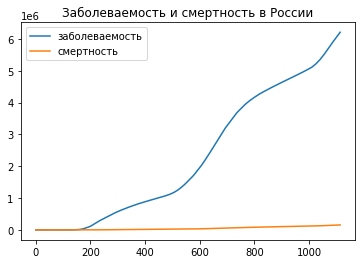

In [ ]:
plt.plot(df_1['confirmed'])
plt.plot(df_1['deaths'])
plt.title('Заболеваемость и смертность в России')
plt.legend(['заболеваемость', 'смертность'])
plt.show()

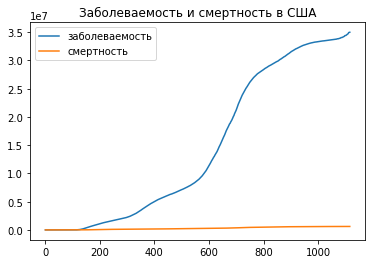

In [ ]:
plt.plot(df_2['confirmed'])
plt.plot(df_2['deaths'])
plt.title('Заболеваемость и смертность в США')
plt.legend(['заболеваемость', 'смертность'])
plt.show()

Построение Линейной регрессии (прогноз Смертей при 25 млн. Заболевших)

In [ ]:
# Формируем выборку по России
df_rus = df[df['country'] == 'Russia']

In [ ]:
# Формирование признака и целевой переменной
X = df_rus[['confirmed']]
y = df_rus[['deaths']]

In [ ]:
from sklearn.linear_model import LinearRegression # Подключение модуля Линейной регрессии
regressor = LinearRegression()                    # Инициализация Линейной регрессии
regressor.fit(X, y)                               # Обучение Линейной регрессии

LinearRegression()

In [ ]:
# Коэффициент прямой
a = regressor.intercept_
a

array([-5713.82792078])

In [ ]:
# Коэффициент наклона прямой
b = regressor.coef_
b

array([[0.02352537]])

In [ ]:
Confirmed_pred = 25000000                     # Задаём значение признака - 25 млн. заболевших
int(regressor.predict([[Confirmed_pred]]))    # Получение прогноза Линейной реграссии (с округлением к целому)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


582420

In [ ]:
# Получение прогноза "в лоб" по уровнению прямой регрессии a + bx (с округлением к целому)
int(a + b * Confirmed_pred)

582420

- Заболеваемость и смертность явно коррелирует
- Заболеваемость и смертность растёт
- Темп распространения берётся под контроль